In [3]:
import tensorflow as tf

from sklearn import svm

import numpy as np

import matplotlib as mplt

import plotly as plt
import pandas as pd

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [19]:
%matplotlib inline

In [20]:
x1 = np.random.logistic(loc=(3,1),size=[200,2],scale=0.3)
c1 = ['red'  for i in range(200)]
y1 = [1  for i in range(200)]

x2 = np.random.logistic(loc=(0,1),size=[200,2],scale=0.3)
c2 = ['blue'  for i in range(200)]
y2 = [2  for i in range(200)]

x3 = np.random.logistic(loc=(5,2),size=[200,2],scale=0.3)
c3 = ['green'  for i in range(200)]
y3 = [3  for i in range(200)]

x4 = np.random.logistic(loc=(2,3),size=[200,2],scale=0.4)
c4 = ['purple'  for i in range(200)]
y4 = [4  for i in range(200)]

In [21]:
x = np.concatenate([x1,x2,x3,x4])
c = np.concatenate([c1,c2,c3,c4])
y = np.concatenate([y1,y2,y3,y4])

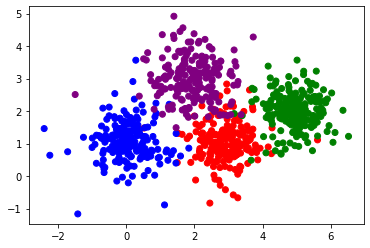

In [22]:
mplt.pyplot.scatter (x[:,0],x[:,1],color=np.array(c))

In [23]:
from sklearn import svm

Model = svm.SVC(kernel='linear',C=1)

In [24]:

X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.75)

In [25]:
Model.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [26]:
test = []
for i in np.arange(-2,8,0.1):
    for j in np.arange(-2,8,0.1):
        test.append(np.array((i,j)))
        

In [27]:
pd.DataFrame(test)

,0,1
0,-2.0,-2.0
1,-2.0,-1.9
2,-2.0,-1.8
3,-2.0,-1.7
4,-2.0,-1.6
...,...,...
9995,7.9,7.5
9996,7.9,7.6
9997,7.9,7.7
9998,7.9,7.8


In [28]:
classeTest = Model.predict(test)
classeTest

yAprox = Model.predict(X_test)

In [29]:
accuracy_score(y_test,yAprox)

0.96

In [30]:
colorsTest = []
for i in range(classeTest.shape[0]):
    if classeTest[i] == 1:
        colorsTest.append('red')
    if classeTest[i] == 2:
        colorsTest.append('blue')
    if classeTest[i] == 3:
        colorsTest.append('green')
    if classeTest[i] == 4:
        colorsTest.append('purple')


In [31]:
test = np.array(test)

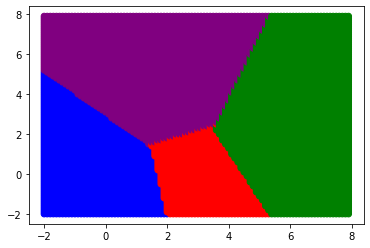

In [32]:
mplt.pyplot.scatter (test[:,0],test[:,1],color=np.array(colorsTest))

In [34]:
yTest2 =  Model.predict(x)
accuracy_score(y,yTest2)

0.95

In [35]:
table = pd.DataFrame(confusion_matrix(y,yTest2), index=['red','blue','green','purple'])

In [36]:
table.columns=['red','blue','green','purple']
table

,red,blue,green,purple
red,184,3,6,7
blue,1,195,0,4
green,5,0,195,0
purple,11,3,0,186


In [37]:
x = np.arange(-2,8,0.1)
aux = pd.DataFrame(np.meshgrid(x,x)[0], index= x)

aux.columns = x

In [38]:
aux=aux.to_numpy()

In [39]:
test[:,0].shape,test[:,1].shape,classeTest.shape

((10000,), (10000,), (10000,))

In [40]:
import plotly.graph_objects as go

In [43]:
fig = go.Figure(data = go.Scatter3d(x=test[:,0],y=test[:,1],z=classeTest))
fig

In [42]:
fig = go.Figure(data =
    go.Contour(
        x=test[:,0],y=test[:,1],z=classeTest
    ))

fig